## Exploratory step

In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' , header=None)

In [3]:
df_wine.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df_wine.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

## Data preparation

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
print ('Total: %s, X_train: %s, X_test: %s, y_train: %s, y_test: %s, ratio: %s' % \
       (len(X), len(X_train), len(X_test), len(y_train), len(y_test), len(X_test)/float(len(X))))

Total: 178, X_train: 124, X_test: 54, y_train: 124, y_test: 54, ratio: 0.303370786517


In [9]:
sc = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Dimensionality reduction

In [10]:
import numpy as np

In [11]:
cov_mat = np.cov(X_train_std.T) #each row of the input matrix has to represent a variable'

In [12]:
eigen_vals, eigen_vectors = np.linalg.eig(cov_mat)

In [13]:
eigen_vals_ratio = [i/sum(eigen_vals) for i in sorted(eigen_vals, reverse=True)]
eigen_vals_ratio

[0.37329647723490672,
 0.18818926106599562,
 0.10896790724757811,
 0.077243894771248739,
 0.064785946018261709,
 0.045920138114781441,
 0.039869355976347075,
 0.025219142607261571,
 0.022581806817679673,
 0.018309244719526899,
 0.01635336265505145,
 0.012842705837492759,
 0.0064207569338682732]

In [14]:
cum_eigen_vals_ratio = np.cumsum(eigen_vals_ratio, axis = 0)
cum_eigen_vals_ratio

array([ 0.37329648,  0.56148574,  0.67045365,  0.74769754,  0.81248349,
        0.85840362,  0.89827298,  0.92349212,  0.94607393,  0.96438317,
        0.98073654,  0.99357924,  1.        ])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

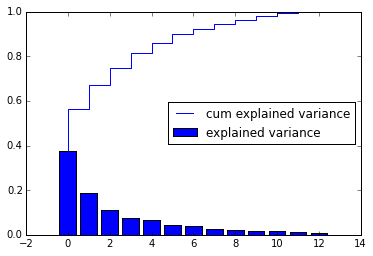

In [16]:
plt.bar(range(len(eigen_vals_ratio)), eigen_vals_ratio, align='center', label = 'explained variance')
plt.step(range(len(cum_eigen_vals_ratio)), cum_eigen_vals_ratio, label='cum explained variance')
plt.legend(loc='best')
plt.show()

In [17]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vectors[:, i]) for i in range(len(eigen_vals))]

In [18]:
eigen_pairs

[(4.8923083032737411,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592293,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048459,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044966,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.84906459334502404,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.1406454

In [19]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [20]:
W.shape

(13L, 2L)

In [21]:
X_train_std.shape

(124L, 13L)

In [22]:
X_train_pca = X_train_std.dot(W)

In [23]:
colors = ['r', 'b', 'g']
markers = ['s' , 'x' , 'o']
labels = np.unique(y_train)

C:\Users\GRANVILLE\Anaconda2\Lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


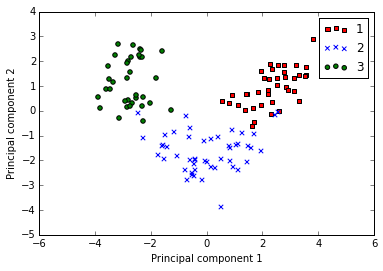

In [24]:
for (lb, c, m) in zip (labels, colors, markers):
    plt.scatter(x=X_train_pca[np.where(y_train==lb),0],y=X_train_pca[np.where(y_train==lb),1], c=c, marker=m, label=lb)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(loc='best')
plt.show()

In [25]:
from matplotlib.colors import ListedColormap

In [115]:
#TO better understand the foolowing
x,y = np.meshgrid(np.arange(0, 3, 1), np.arange(2, 8, 1), sparse=False)
print("x")
print(x)
print("y")
print(y)
xx = x.ravel()
yy = y.ravel()
print("xx")
print(xx)
print("yy")
print(yy)
z = np.array((xx, yy))
print("z")
print(z)
print("zT: Tous les couples du plan sont affiches")
print(z.T)

x
[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
y
[[2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]
xx
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
yy
[2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7]
z
[[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
 [2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7]]
zT: Tous les couples du plan sont affiches
[[0 2]
 [1 2]
 [2 2]
 [0 3]
 [1 3]
 [2 3]
 [0 4]
 [1 4]
 [2 4]
 [0 5]
 [1 5]
 [2 5]
 [0 6]
 [1 6]
 [2 6]
 [0 7]
 [1 7]
 [2 7]]


In [146]:
def plot_decision_region(x, y, classifier, resolution=0.02):
    markers = ['x', '*', '+']
    colors  = ['red', 'blue', 'green']
    cmap = ListedColormap(colors[: len(np.unique(colors))])
    
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    print("xx1")
    print(xx1)
    print("xx2")
    print(xx2)
    
    print("xx1 ravel")
    print(xx1.ravel())
    print("xx2 ravel")
    print(xx2.ravel())
    z = np.array((xx1.ravel(),xx2.ravel())).T
    print("#3")
    print(z)
    z = classifier.predict(z)
    print(z)
    z = z.reshape(xx1.shape)
    print(z)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    
    
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x[np.where(y==cl),0], x[np.where(y==cl),1], marker=markers[i], c=colors[i], label=cl)
    plt.legend(loc='best')
    plt.xlabel('Pricinpal component 1')
    plt.ylabel('Pricinpal component 2')
    plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg = LogisticRegression(C=1)
lg.fit(X_train_pca, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

xx1
[[-3.89082853 -3.87082853 -3.85082853 ...,  4.32917147  4.34917147
   4.36917147]
 [-3.89082853 -3.87082853 -3.85082853 ...,  4.32917147  4.34917147
   4.36917147]
 [-3.89082853 -3.87082853 -3.85082853 ...,  4.32917147  4.34917147
   4.36917147]
 ..., 
 [-3.89082853 -3.87082853 -3.85082853 ...,  4.32917147  4.34917147
   4.36917147]
 [-3.89082853 -3.87082853 -3.85082853 ...,  4.32917147  4.34917147
   4.36917147]
 [-3.89082853 -3.87082853 -3.85082853 ...,  4.32917147  4.34917147
   4.36917147]]
xx2
[[-3.87214144 -3.87214144 -3.87214144 ..., -3.87214144 -3.87214144
  -3.87214144]
 [-3.85214144 -3.85214144 -3.85214144 ..., -3.85214144 -3.85214144
  -3.85214144]
 [-3.83214144 -3.83214144 -3.83214144 ..., -3.83214144 -3.83214144
  -3.83214144]
 ..., 
 [ 2.82785856  2.82785856  2.82785856 ...,  2.82785856  2.82785856
   2.82785856]
 [ 2.84785856  2.84785856  2.84785856 ...,  2.84785856  2.84785856
   2.84785856]
 [ 2.86785856  2.86785856  2.86785856 ...,  2.86785856  2.86785856
   2.867

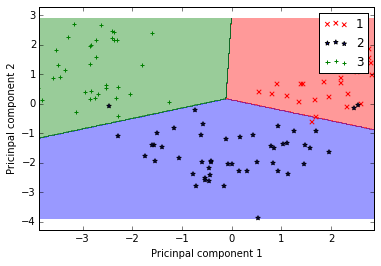

In [147]:
plot_decision_region(X_train_pca, y_train, lg, resolution=0.02)